In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (70000, 784)
Shape of y: (70000,)


In [14]:
y = y.astype(np.int8)

# Select only digits 0 and 1
binary_filter = (y == 0) | (y == 1)
X_binary = X[binary_filter]
y_binary = y[binary_filter]

print("New shape:", X_binary.shape)
print("Labels used:", np.unique(y_binary))

New shape: (14780, 784)
Labels used: [0 1]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42
)

In [16]:
# Logistic Regression (with solver optimized for large datasets)
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [19]:
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9996617050067659

Confusion Matrix:
 [[1401    1]
 [   0 1554]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1402
           1       1.00      1.00      1.00      1554

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956



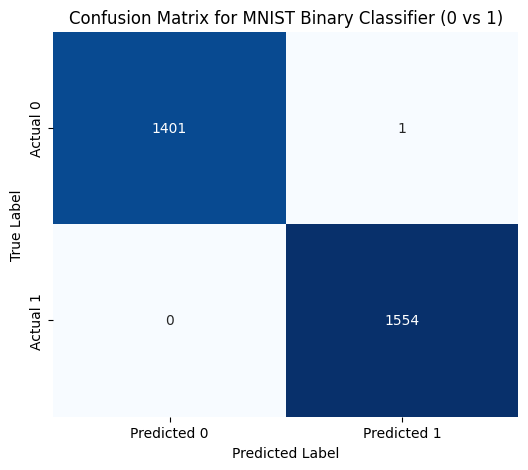

In [20]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot a nice heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix for MNIST Binary Classifier (0 vs 1)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

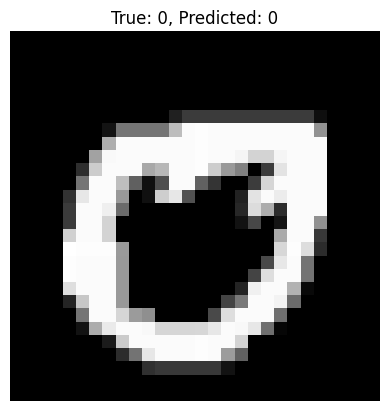

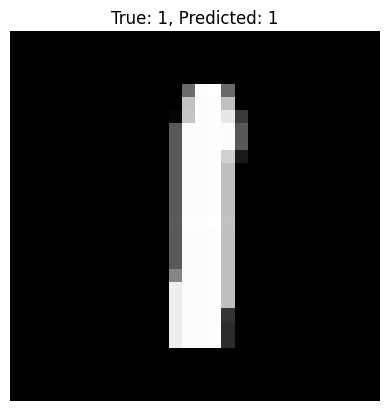

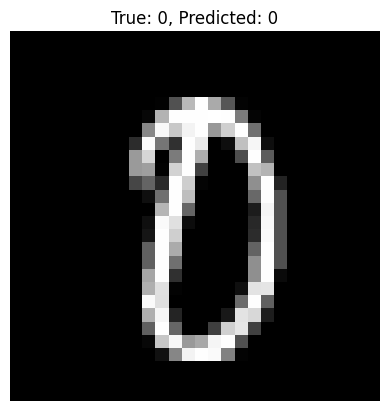

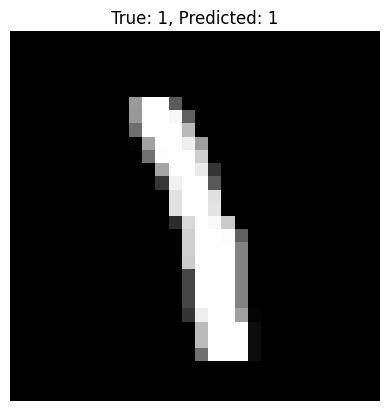

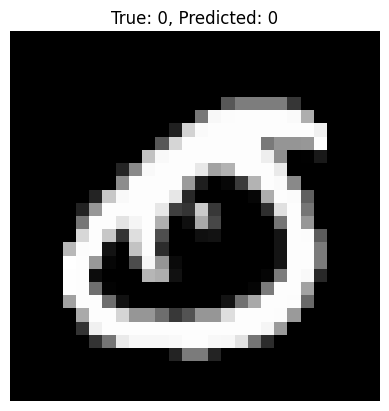

In [21]:
# Display first 5 test images with predictions
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {y_pred[i]}")
    plt.axis('off')
    plt.show()

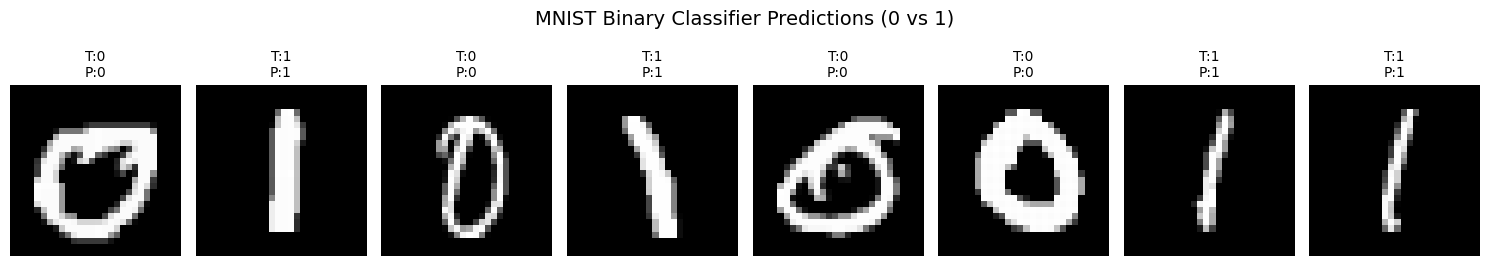

In [22]:
import matplotlib.pyplot as plt

# Number of images to show
num_images = 8

# Create a figure with 8 subplots in one row
plt.figure(figsize=(15, 3))  # Wider figure for horizontal layout

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"T:{y_test[i]}\nP:{y_pred[i]}", fontsize=10)
    plt.axis('off')

plt.suptitle("MNIST Binary Classifier Predictions (0 vs 1)", fontsize=14)
plt.tight_layout()
plt.show()